Uma analise visual do trafego na rede Tor após a invasão russa à Ucrânia.
Todos os dados foram extraídos de https://metrics.torproject.org

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Importacao dos CSVs
def relayImport(x):
    return pd.read_csv('https://metrics.torproject.org/userstats-relay-country.csv?country=' + str(x), comment='#', parse_dates=['date'], index_col=['date'])

def bridgeImport(x):
    return pd.read_csv('https://metrics.torproject.org/userstats-bridge-country.csv?country=' + str(x), comment='#', parse_dates=['date'], index_col=['date'])

relayRu = relayImport('ru')
relayUa = relayImport('ua')

bridgeRu = bridgeImport('ru')
bridgeUa = bridgeImport('ua')

In [46]:
# Funcao para agilizar a plotagem
def viz(axes, a, b, color, xlabel, ylabel):
    axes.plot(a, b, color=color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.tick_params('y', color=color)

def porcentagem(a, b):
    return 'Crescimento de: ' + str(a / b * 100) + '%.'

def plotAnnotate(axes, tag, x, y, xtext, ytext, style, color):
    axes.annotate(tag, xy=(x, y), xytext=(xtext, ytext), arrowprops={'arrowstyle': style, 'color': color})


'Crescimento de: 152.4390243902439%.'

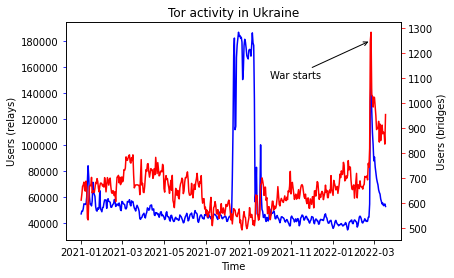

In [50]:

fig, ax = plt.subplots()

start = '2021-01-01'

relayUa_ytd, bridgeUa_ytd = relayUa[start:], bridgeUa[start:]

ax2 = ax.twinx()

viz(ax, relayUa_ytd.index, relayUa_ytd['users'], 'blue', 'Time', 'Users (relays)')
viz(ax2, bridgeUa_ytd.index, bridgeUa_ytd['users'], 'red', 'Time', 'Users (bridges)')

plotAnnotate(ax2, 'War starts', pd.Timestamp('2022-02-24'), bridgeUa['users'].loc['2022-02-24'], pd.Timestamp('2021-10-01'), 1100, \
    '->', 'black')

plt.title('Tor activity in Ukraine')

porcentagem(bridgeUa['users'].loc['2022-02-24'], bridgeUa['users'].loc['2022-02-23'])

'Crescimento de: 110.79849869638714%.'

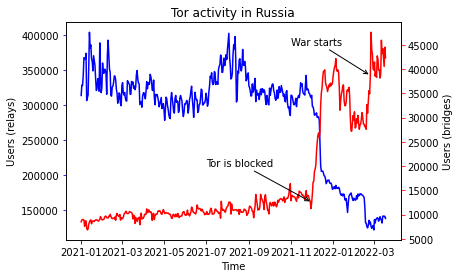

In [51]:
fig, ax = plt.subplots()

relayRu_ytd, bridgeRu_ytd = relayRu[start:], bridgeRu[start:]

ax2 = ax.twinx()

viz(ax, relayRu_ytd.index, relayRu_ytd['users'], 'blue', 'Time', 'Users (relays)')
viz(ax2, bridgeRu_ytd.index, bridgeRu_ytd['users'], 'red', 'Time', 'Users (bridges)')

plotAnnotate(ax2, 'Tor is blocked', pd.Timestamp('2021-12-01'), bridgeRu['users'].loc['2021-12-01'], \
    pd.Timestamp('2021-07-01'), 20000, '->', 'black')

plotAnnotate(ax2, 'War starts', pd.Timestamp('2022-02-24'), bridgeRu['users'].loc['2022-02-24'], \
    pd.Timestamp('2021-11-01'), 45000, '->', 'black')

plt.title('Tor activity in Russia')

porcentagem(bridgeRu['users'].loc['2022-02-24'], bridgeRu['users'].loc['2022-02-23'])


'Crescimento de: 120.9315637356684%.'

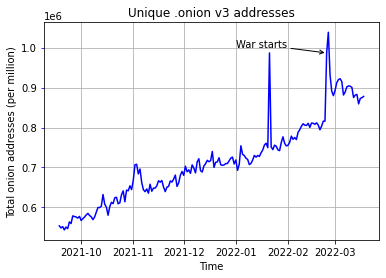

In [52]:
onionDirs = pd.read_csv('https://metrics.torproject.org/hidserv-dir-v3-onions-seen.csv', comment='#', parse_dates=['date'], index_col='date')

fig, ax = plt.subplots()

viz(ax, onionDirs.loc[start:].index, onionDirs['onions'].loc[start:], 'blue', 'Time', 'Total onion addresses (per million)')
ax.grid(True)

plotAnnotate(ax, 'War starts', pd.Timestamp('2022-02-24'), onionDirs['onions'].loc['2022-02-24'], \
    pd.Timestamp('2022-01-01'), 1000000, '->', 'black')

ax.set_title('Unique .onion v3 addresses')

porcentagem(onionDirs['onions'].loc['2022-02-24'], onionDirs['onions'].loc['2022-02-23'])